In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [4]:
df = pd.read_csv('Data.csv')
df.head()

,Location,Social Category,PrimaryGirls,PrimaryBoys,PrimaryOverall,UpperGirls,UpperBoys,UpperOverall,SecondGirls,SecondBoys,SecondOverall
0,AHMEDABAD,General,0.00,0.00,0.00,0.00,0.00,0.00,8.02,12.34,10.54
1,AHMEDABAD,OBC,0.64,1.10,0.89,9.37,4.14,6.46,18.43,23.13,21.40
2,AHMEDABAD,SC,0.00,0.00,0.00,0.00,4.13,1.26,0.00,10.65,6.08
3,AHMEDABAD,ST,5.92,5.72,5.81,9.68,13.69,12.07,24.31,10.94,16.57
4,AMRELI,General,0.87,0.00,0.00,0.00,0.00,0.00,1.56,11.80,6.97


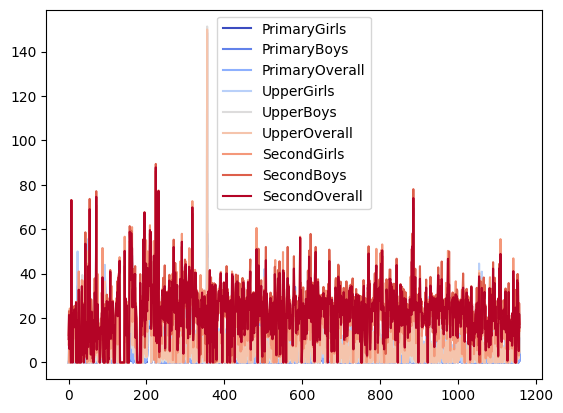

In [7]:
df.plot(colormap = 'coolwarm')
plt.show()

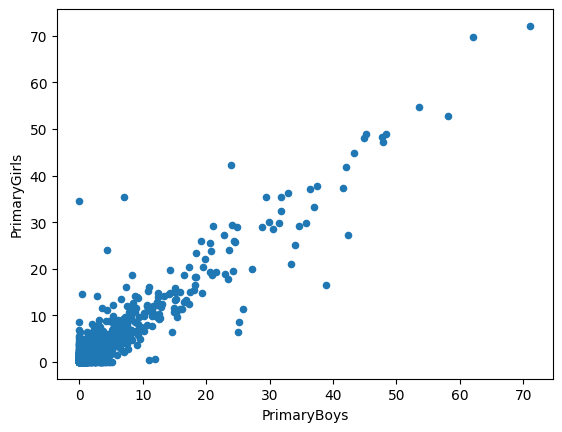

In [453]:
df.plot.scatter('PrimaryBoys' ,'PrimaryGirls')
y = df['PrimaryBoys']
x = df['PrimaryGirls']

In [454]:
df.head()

,Location,Social Category,PrimaryGirls,PrimaryBoys,PrimaryOverall,UpperGirls,UpperBoys,UpperOverall,SecondGirls,SecondBoys,SecondOverall
0,AHMEDABAD,General,0.00,0.00,0.00,0.00,0.00,0.00,8.02,12.34,10.54
633,AHMEDABAD,OBC,18.12,18.26,18.19,26.75,19.81,22.98,35.95,39.83,38.35
632,AHMEDABAD,General,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.50,0.42
764,AHMEDABAD,General,9.23,12.54,11.02,12.00,12.73,12.40,12.77,21.93,18.05
765,AHMEDABAD,OBC,0.00,0.00,0.00,0.43,0.00,0.00,16.72,24.65,21.60


# prediction for overall data

In [455]:
df = df.sort_values('Location')

In [456]:
y = df[['PrimaryOverall',  'UpperOverall' , 'SecondOverall']]
x = df[['PrimaryBoys' ,'PrimaryGirls' ,'UpperBoys' ,'UpperGirls','SecondBoys' , 'SecondGirls']]

In [457]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=12, test_size=0.25)

In [465]:
#print("degree------R2-----------------MAe-----------------------lr")
#for i in range(0,11):
poly = PolynomialFeatures(degree=1)
poly.fit(x_train)
x_train_poly = poly.transform(x_train)
x_test_poly = poly.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_poly,y_train)

prediction = lr.predict(x_test_poly)
print(i , "    " , metrics.r2_score(prediction , y_test),"   ",metrics.mean_absolute_error(prediction, y_test),"    ", lr.score(x_test_poly , y_test) )
print()
print()

10      0.9972891984021767     0.2335849961715889      0.9973240444318696




In [479]:
pred = lr.predict([[ df['PrimaryBoys'].mean() , df['PrimaryGirls'].mean() , df['UpperBoys'].mean() , df['UpperGirls'].mean() , df['SecondBoys'].mean() , df['SecondGirls'].mean() , 1.12 ]])

In [480]:
pred

array([[ 4.97969538, 15.86916711, 12.21695214]])